# Práctica Machine Learning
## Tania Gualli

### Estimación del precio del airbnb 

En este notebook haremos un análisis exploratorio básico del dataset extraído de Airbnb mediante técnicas
de scraping, para familiarizarnos con los datos y posteriormente aplicar técnicas de machine learning sobre ellos. 

In [387]:
import numpy  as np  
import pandas as pd

pd.options.display.max_rows = None #para mostrar todas las filas
pd.options.display.max_columns = None #para mostrar todas las columnas

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Carga de datos y división train/test

In [390]:
#Carga de datos
airbnb_data_inicial = pd.read_csv("airbnb-listings-extract.csv", sep=';') # cargamos fichero
print(airbnb_data_inicial.shape)
airbnb_data_inicial.head(5).T                                # visualizamos 5 primeras filas

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat..."
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza Cataluña Catalonia Square is the large...,Plaza Cataluña Catalonia Square is the large...,We're right in the heart of the chic L'Eixampl...,NaN


In [588]:
airbnb_data_inicial.shape

(14780, 89)

In [392]:
#División train/test
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("airbnb-listings-extract.csv", sep=';')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_data = pd.read_csv('airbnb_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


## 2. Análisis exploratorio

Se procede a analizar la estructura básica del dataset con la función `describe`.

In [394]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,2869.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,378.437348,1432.390728,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,8.949002,22.949256,39.803958,202.217185,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,194.751472,1236.992934,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,9.340334,19.762734,29.663314,128.006830,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,220.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,500.000000,1750.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [395]:
airbnb_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

También se revisó el contenido de las variables a fin de analizar si aportan información útil para predecir el precio.  Posterior a la revisión de datos se comentaron las líneas para mejorar el desplazamiento en el notebook.

In [ ]:
#airbnb_data['Neighbourhood Cleansed'].value_counts()

In [ ]:
#airbnb_data['State'].value_counts()

In [ ]:
#airbnb_data['City'].value_counts()

In [ ]:
#airbnb_data['Market'].value_counts()

In [ ]:
#airbnb_data['Smart Location'].value_counts()

In [131]:
#airbnb_data['Country Code'].value_counts()

In [ ]:
#airbnb_data['Property Type'].value_counts()

In [ ]:
#airbnb_data['Room Type'].value_counts()

In [ ]:
#airbnb_data['Accommodates'].value_counts()

In [ ]:
#airbnb_data['Bed Type'].value_counts()

In [ ]:
#airbnb_data['Security Deposit'].value_counts()

In [ ]:
#airbnb_data['Cleaning Fee'].value_counts()

In [ ]:
#airbnb_data['Guests Included'].value_counts()

In [ ]:
#airbnb_data['Extra People'].value_counts()

In [ ]:
#airbnb_data['Calendar Updated'].value_counts()

In [ ]:
#airbnb_data['Availability 30'].value_counts()

In [ ]:
#airbnb_data['Availability 60'].value_counts()

In [ ]:
#airbnb_data['Availability 90'].value_counts()

In [ ]:
#airbnb_data['Availability 365'].value_counts()

In [ ]:
#airbnb_data['Calendar last Scraped'].value_counts()

In [123]:
#airbnb_data['Review Scores Rating'].value_counts()

In [169]:
#airbnb_data['Review Scores Value'].value_counts()

In [171]:
#airbnb_data['Reviews per Month'].value_counts()

Con base a la información revisada se identificó lo siguiente:

#### 2.1 VARIABLES QUE NO APORTAN INFORMACIÓN ÚTIL PARA PREDECIR EL PRECIO

**Columnas de Identificación o Únicas**
ID, Host ID, Scrape ID, Zipcode

**Descripciones Textuales o Datos No Estructurados**
Algunas de estas variables podrían tener información relevante, sin embargo es necesario realizar otro tipo de tratamiento mediante lenguaje de procesamiento natural, que por el momento no se lo realizará. 

Name, Summary, Space, Description, Experiences Offered, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules, Amenities, Features.                           

**URLs**
Listing Url, Thumbnail Url, Medium Url, Picture Url, XL Picture Url

**Información Host**
Estas variables tienen información del dueño, pero no de la propiedad.

Host URL, Host Name, Host Since, Host Location, Host About, Host Response Time, Host Response Rate, Host Acceptance Rate, Host Thumbnail Url, Host Picture Url, Host Neighbourhood, Host Listings Count, Host Total Listings Count, Host Verifications.  Se mantiene Host Since, a fin de calcular la antigüedad del dueño de la propiedad, en la plataforma.

**Localización**

Street: no tienen información de calles, tiene datos de ciudad, país, que están en otras variables

Market: similar a la información de la variable City

Country, Country Code: Country tiene nulos y aunque Country Codo no tiene nulos, se decide trabajar solo con la variable City

Smart Location: tiene ciudad y país separado por coma, se elimina dado que se tienen en los campos City y Country


**Precio semanal y mensual**

Weekly Price, Monthly Price: se usará como variable predictora la variable Price, por lo tanto se eliminan estas variables.

**Otras que no aportan información útil o nueva**
Last Scraped, Calendar last Scraped
Latitude, Longitude,
Calendar Updated,
Cancellation Policy,
Calculated host listings count,
Geolocation,
Reviews per Month

**Fechas y puntajes parciales de comentarios**
First Review,
Last Review, 
Review Scores Accuracy,
Review Scores Cleanliness,
Review Scores Checkin,
Review Scores Communication,
Review Scores Location

#### 2.2 VARIABLES CON ALTO PORCENTAJE DE NULOS

In [400]:
#Para verificar el porcentaje de nulos
(airbnb_data.isnull().sum()/len(airbnb_data))*100

ID                                 0.000000
Listing Url                        0.000000
Scrape ID                          0.000000
Last Scraped                       0.000000
Name                               0.008457
Summary                            3.966509
Space                             26.268606
Description                        0.050744
Experiences Offered                0.000000
Neighborhood Overview             38.185047
Notes                             61.578146
Transit                           38.743234
Access                            43.648512
Interaction                       44.248985
House Rules                       35.038904
Thumbnail Url                     19.409675
Medium Url                        19.409675
Picture Url                        0.152233
XL Picture Url                    19.409675
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.025372
Host Since                      

Como política se define que aquellas variables que presenten un porcentaje superior al 90% de nulos, no se las va a considerar, en este caso son: Square Feet, Has Availability, License, Jurisdiction Names

In [403]:
#Con base a este primer análisis se eliminan las columnas indicadas

remove_columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street', 'Zipcode', 'Market',
       'Smart Location', 'Country', 'Latitude', 'Longitude', 'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
       'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features' ]

airbnb_data.drop(remove_columns, axis=1, inplace=True)
                               
airbnb_data.head(5).T

,0,1,2,3,4
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Country Code,ES,ES,ES,ES,ES
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2


**Análisis de la información del barrio:**
Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed: muestra información del barrio

In [406]:
#Para ver el número de valores únicos 
#Neighbourhood
airbnb_data["Neighbourhood"].unique()
len(pd.unique(airbnb_data['Neighbourhood']))

352

In [408]:
#Neighbourhood Cleansed
len(pd.unique(airbnb_data['Neighbourhood Cleansed']))

444

In [410]:
#Neighbourhood Group Cleansed
len(pd.unique(airbnb_data['Neighbourhood Group Cleansed']))

48

Al analizar los valores distintos en los campos de "Barrio", se decide usar el campo Neighbourhood Group Cleansed, dado que tiene el menor valor de valores únicos.  Sin embargo, dado que esta variable tiene nulos, se procede a imputar con los valores de 'Neighbourhood Cleansed'

In [413]:
#Imputación de valores de barrio
airbnb_data["Neighbourhood Group Cleansed"].fillna(airbnb_data["Neighbourhood Cleansed"], inplace=True)

In [415]:
#Eliminación de las columnas de barrio que no se usarán
airbnb_data.drop('Neighbourhood', axis=1, inplace=True)
airbnb_data.drop('Neighbourhood Cleansed', axis=1, inplace=True)

**Análisis de datos de ciudad, país:**
Dado ya que la mayoría de valores en las variables 'City' y 'State' corresponden a "Madrid".  De igual forma, Country Code corresponde a "España", se procede a eliminar estas variables.

In [418]:
airbnb_data.drop('City', axis=1, inplace=True)
airbnb_data.drop('Country Code', axis=1, inplace=True)
airbnb_data.drop('State', axis=1, inplace=True)

#### 2.3 IMPUTACIÓN

Las siguientes variables tienen valores ausentes; hay que imputar. En este caso se rellena con la moda (valor más frecuente), debido al tipo de variable (Bathrooms, Bedrooms, Beds ...), en tanto que la variable precio se rellena con la media.

In [421]:
#Imputación con la moda
airbnb_data['Bathrooms'].fillna(airbnb_data['Bathrooms'].mode()[0], inplace=True)
airbnb_data['Bedrooms'].fillna(airbnb_data['Bedrooms'].mode()[0], inplace=True)
airbnb_data['Beds'].fillna(airbnb_data['Beds'].mode()[0], inplace=True)

airbnb_data['Security Deposit'].fillna(airbnb_data['Security Deposit'].mode()[0], inplace=True)
airbnb_data['Cleaning Fee'].fillna(airbnb_data['Cleaning Fee'].mode()[0], inplace=True)

airbnb_data['Review Scores Rating'].fillna(airbnb_data['Review Scores Rating'].mode()[0], inplace=True)
airbnb_data['Review Scores Value'].fillna(airbnb_data['Review Scores Value'].mode()[0], inplace=True)


In [423]:
#Imputación con la media
airbnb_data['Price'].fillna(airbnb_data['Price'].mean(), inplace=True)


In [425]:
#Para verificar nuevamente el porcentaje de nulos
(airbnb_data.isnull().sum()/len(airbnb_data))*100

Host Since                      0.025372
Neighbourhood Group Cleansed    0.000000
Property Type                   0.000000
Room Type                       0.000000
Accommodates                    0.000000
Bathrooms                       0.000000
Bedrooms                        0.000000
Beds                            0.000000
Bed Type                        0.000000
Price                           0.000000
Security Deposit                0.000000
Cleaning Fee                    0.000000
Guests Included                 0.000000
Extra People                    0.000000
Minimum Nights                  0.000000
Maximum Nights                  0.000000
Availability 30                 0.000000
Availability 60                 0.000000
Availability 90                 0.000000
Availability 365                0.000000
Number of Reviews               0.000000
Review Scores Rating            0.000000
Review Scores Value             0.000000
dtype: float64

In [427]:
airbnb_data.dtypes

Host Since                       object
Neighbourhood Group Cleansed     object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Number of Reviews                 int64
Review Scores Rating            float64
Review Scores Value             float64
dtype: object

In [429]:
#Cambio de tipo de datos
airbnb_data['Bathrooms'] = airbnb_data['Bathrooms'].astype(int)
airbnb_data['Bedrooms'] = airbnb_data['Bedrooms'].astype(int)
airbnb_data['Beds'] = airbnb_data['Beds'].astype(int)


#### 2.5 Análisis de outliers
Se reallizan representaciones gráficas para un mejor entendimiento de los datos. Se va a representar los histogramas de algunos atributos: *Bathrooms*, *Bedrooms*, *Review Scores Value*, *Price*

Esto permitirá, tener una idea de cómo son las ditribuciones de cada una de las variables y permitirá verificar si existen datos anómalos o **outliers**

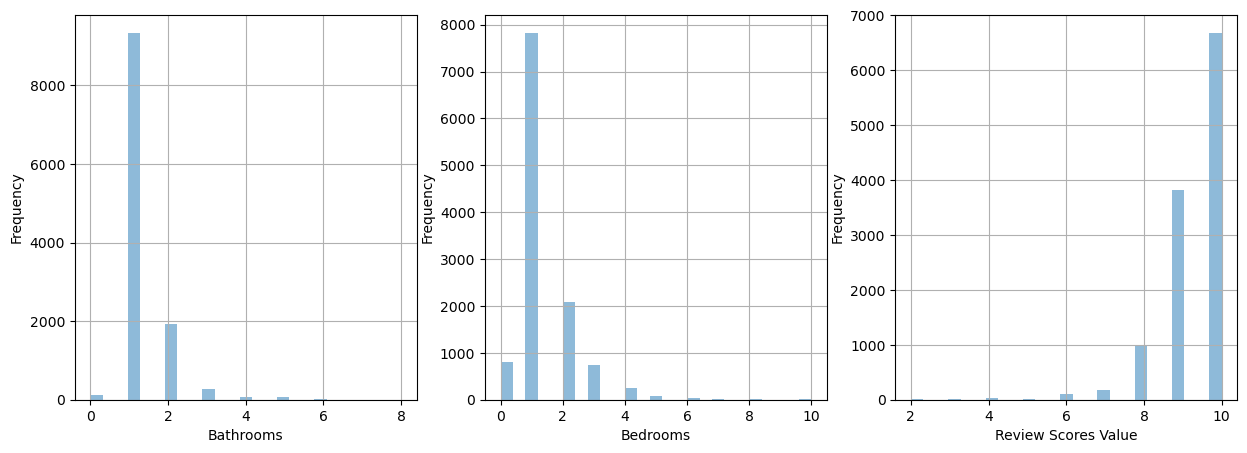

In [432]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
plt.xlabel('Bathrooms')

plt.subplot(1,3,2)
airbnb_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("log")
plt.xlabel('Bedrooms')

plt.subplot(1,3,3)
airbnb_data['Review Scores Value'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Value')

plt.show()

Se puede observar propiedades con cero baños o con cero dormitorios.  Se confirma con el siguiente conteo:

In [435]:
airbnb_data['Bathrooms'].value_counts()

Bathrooms
1    9331
2    1930
3     281
0     109
4      81
5      58
6      25
7       5
8       4
Name: count, dtype: int64

In [437]:
airbnb_data['Bedrooms'].value_counts()

Bedrooms
1     7821
2     2089
0      814
3      734
4      241
5       74
6       29
7        9
8        7
10       6
Name: count, dtype: int64

In [439]:
airbnb_data['Beds'].value_counts()

Beds
1     5899
2     3088
3     1317
4      736
5      317
6      188
7       83
8       77
10      42
9       33
16      12
11       9
12       9
14       6
13       5
15       3
Name: count, dtype: int64

In [441]:
airbnb_data['Review Scores Value'].value_counts()

Review Scores Value
10.0    6676
9.0     3812
8.0      976
7.0      177
6.0      109
4.0       28
2.0       21
5.0       20
3.0        5
Name: count, dtype: int64

Una vez analizadas las variables por separado, se requiee entender las relaciones entre cada una de las variables/atributos ($\mathbf{x}$) y la variable respuesta ($y$). 

Para ello se va a utilizar un scatter plot con la variable objetivo definida $y$ como variable dependiente, y alguna una de las variables explicativas como variables independientes.

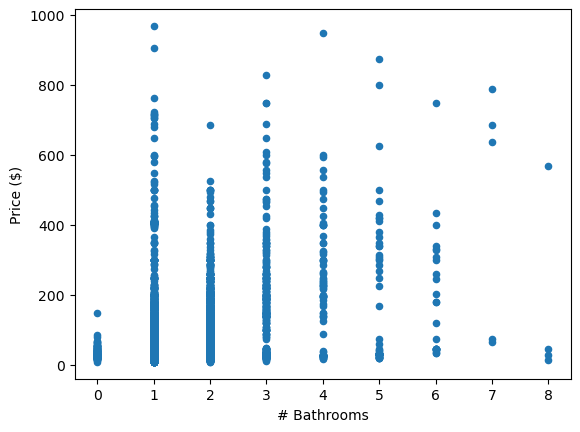

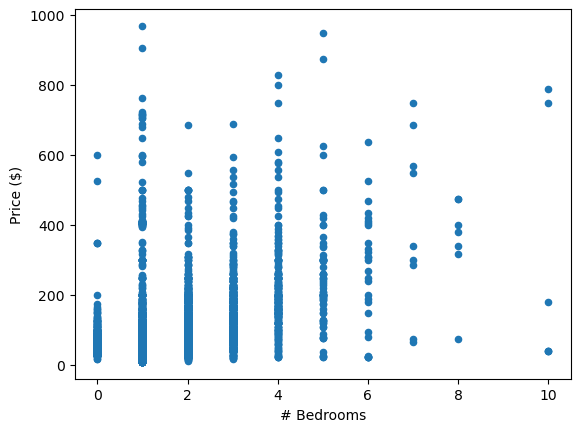

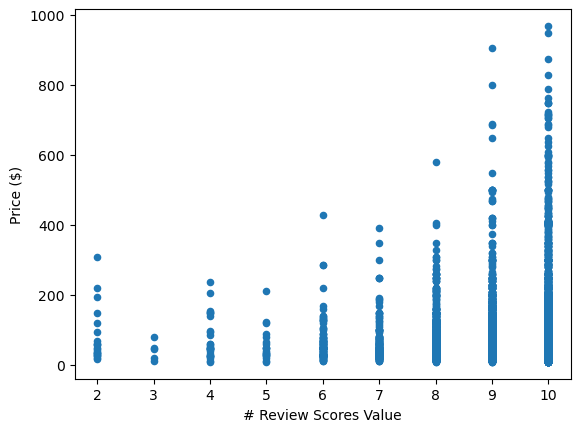

In [444]:
# Sólo representamos 3: Bathrooms, Bedrooms y Review Scores Value
# el resto se puede repetir una a una

airbnb_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

airbnb_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

airbnb_data.plot(kind = 'scatter',x='Review Scores Value',y = 'Price')
plt.xlabel('# Review Scores Value')
plt.ylabel('Price ($)')
plt.show()

#house_data.boxplot(by='waterfront',column = 'price')
#plt.show()

Se puede observar que propiedades con mayor número de baños o habitaciones tienen precios menores.  Para el caso de baños, el precio parece disminuir a partir de 5 y en el caso de las habitaciones a partir de 6.  Se van a utilizar estos valores en la eliminación de outliers.

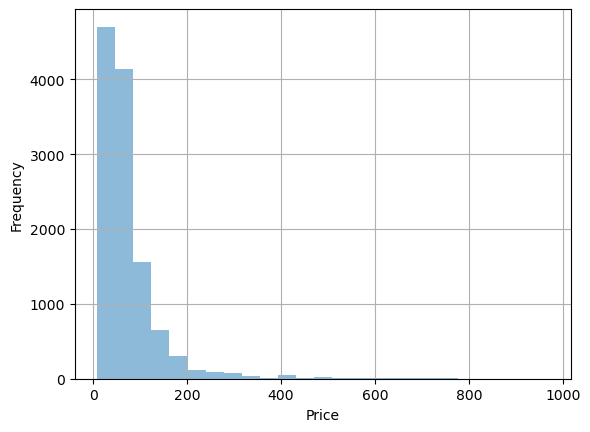

In [447]:
#Análisis de outliers de la variable Price
airbnb_data_no_outliers_price = airbnb_data[airbnb_data['Price'] < 300]
airbnb_data['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

Se observa que la gran mayoría de datos están concentrados alrededor del valor 300, por lo que se usará este número para la eliminación de outliers


In [450]:
# Se eliminan los registros con precios menores a 300
airbnb_data_no_outliers_price = airbnb_data[airbnb_data['Price'] < 300]
airbnb_data = airbnb_data[airbnb_data['Price'] < 300]

In [452]:
# Verificación de registros perdidos
#airbnb_data_no_outliers_price = airbnb_data[airbnb_data['Price'] < 300]
print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_price.shape[0]}\nDiferencia: {airbnb_data.shape[0] - airbnb_data_no_outliers_price.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_data_no_outliers_price.shape[0])/airbnb_data.shape[0])*100:2f}%')

Original: 11597 // Modificado: 11597
Diferencia: 0
Variación: 0.000000%


#### Eliminación de outliers

Tanto con los scatter plot como con los análisis de `value_counts`, se ve que hay unos pocos outliers en las variables Bathrooms y Bedrooms. Se procede a eliminar con un filtro.

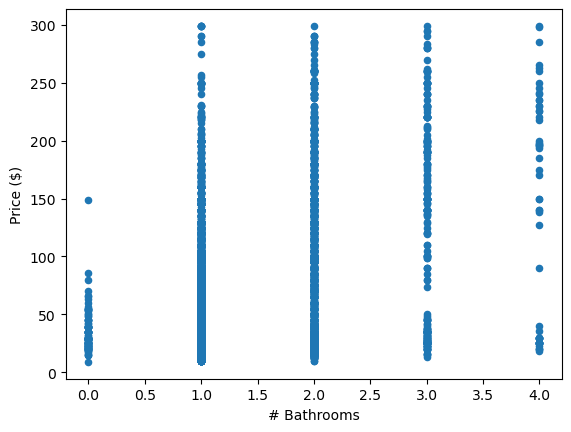

In [457]:
airbnb_data_no_outliers_bathrooms = airbnb_data[airbnb_data['Bathrooms'] < 5]

airbnb_data_no_outliers_bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

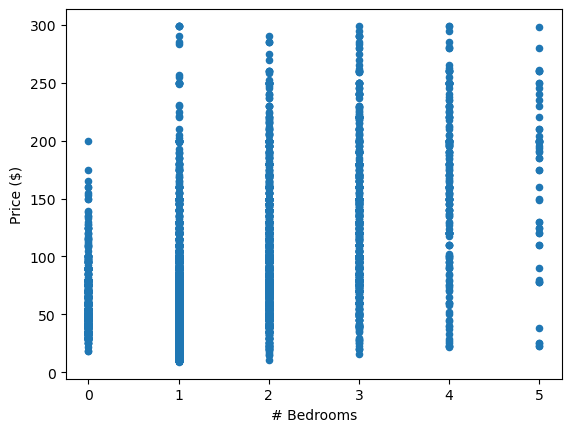

In [459]:
airbnb_data_no_outliers_bedrooms = airbnb_data[airbnb_data['Bedrooms'] < 6]

airbnb_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

Para verificar cuanto se ha perdido con la eliminación

In [462]:
print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_bathrooms.shape[0]}\nDiferencia: {airbnb_data.shape[0] - airbnb_data_no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_data_no_outliers_bathrooms.shape[0])/airbnb_data.shape[0])*100:2f}%')


Original: 11597 // Modificado: 11535
Diferencia: 62
Variación: 0.534621%


In [464]:
print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_data.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0])/airbnb_data.shape[0])*100:2f}%')

Original: 11597 // Modificado: 11574
Diferencia: 23
Variación: 0.198327%


**Eliminación de registros con valores cero**

In [467]:
#liminación de registros con valores cero
airbnb_data = airbnb_data[airbnb_data['Bathrooms'] != 0]
airbnb_data = airbnb_data[airbnb_data['Bathrooms'] != 0]
airbnb_data = airbnb_data[airbnb_data['Price'] != 0]

#### 2.6 Generación de nuevas características

En esta sección se va a analizar sobre la creación de otras variables que tengan sentido.

* Construir el atributo antigüedad del dueño de la propiedad, en la plataforma, en lugar de la fecha de registro (Host since).

* Intentar capturar la relación entre dormitorios y baños

* Dado que se observó que hay propiedades con un alto número de habitaciones y con precios más bajos que aquellas con un menor número, es una indicación de que posiblemente se hayan subdividido habitaciones para poder tener más huéspedes. Por tanto, un número de dormitorios mayor puede ser mejor hasta cierto punto, lo cual queda recogido al elevar al cuadrado esta variable.


In [470]:
#Antigüedad del dueño en la plataforma
from datetime import datetime

airbnb_data.dropna(subset=['Host Since'], inplace=True) #se vió antes que los valores nulos corresponden al 0,02%

airbnb_data['Host Since'] = airbnb_data['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
airbnb_data['Years Being Host'] = airbnb_data['Host Since'].apply(lambda x: 2024 - x.year)

airbnb_data.drop(['Host Since'], axis=1, inplace=True)

In [472]:
#elevar el número de habitaciones al cuadrado
airbnb_data['bedrooms_squared'] = airbnb_data['Bedrooms'].apply(lambda x: x**2)

#relación entre dormitorios y baños
airbnb_data['bed_bath_rooms']   = airbnb_data['Bedrooms']*airbnb_data['Bathrooms']

#### 2..4 Encoder de variables categóricas

In [475]:
#Encoder de variables categóricas
categorical = ['Property Type', 'Room Type', 'Bed Type', 'Neighbourhood Group Cleansed']

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = airbnb_data.groupby(c)['Price'].mean()
    airbnb_data[c] = airbnb_data[c].map(mean)    
    mean_map[c] = mean

In [477]:
# Rellenar los valores NaNs con la media de las columnas numéricas
cols = airbnb_data.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
airbnb_data = airbnb_data[cols]

airbnb_data.fillna(airbnb_data.mean(), inplace=True)

In [479]:
#Para verificar nuevamente el porcentaje de nulos
(airbnb_data.isnull().sum()/len(airbnb_data))*100

Price                           0.0
Neighbourhood Group Cleansed    0.0
Property Type                   0.0
Room Type                       0.0
Accommodates                    0.0
Bathrooms                       0.0
Bedrooms                        0.0
Beds                            0.0
Bed Type                        0.0
Security Deposit                0.0
Cleaning Fee                    0.0
Guests Included                 0.0
Extra People                    0.0
Minimum Nights                  0.0
Maximum Nights                  0.0
Availability 30                 0.0
Availability 60                 0.0
Availability 90                 0.0
Availability 365                0.0
Number of Reviews               0.0
Review Scores Rating            0.0
Review Scores Value             0.0
Years Being Host                0.0
bedrooms_squared                0.0
bed_bath_rooms                  0.0
dtype: float64

### Análisis de correlaciones

Una vez realizado un primer análisis exploratorio, el siguiente paso es evaluar las correlaciones entre las diferente variables del problema, a fin de identificar posibles atributos que estén altamente correlacionados. En este caso, se establece como umbral 0.9, de modo que se van a descartar aquellas variables con una correlación superior a este valor.

In [483]:
airbnb_data.corr() # matriz de correlación

,Price,Neighbourhood Group Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Value,Years Being Host,bedrooms_squared,bed_bath_rooms
Price,1.000000,0.452996,0.136343,0.559447,0.618406,0.302276,0.531559,0.483479,0.045064,0.324405,0.442231,0.387348,0.124881,0.030437,0.001899,0.008865,-0.020311,-0.046849,0.048924,-0.032430,0.054777,0.016788,0.134625,0.474884,0.475389
Neighbourhood Group Cleansed,0.452996,1.000000,0.112843,0.237923,0.257494,0.201729,0.201505,0.199886,0.012454,0.122930,0.183558,0.125230,0.093075,0.011334,0.001195,-0.011947,-0.043934,-0.064265,-0.025166,0.029989,0.012009,0.001159,0.147938,0.215578,0.264595
Property Type,0.136343,0.112843,1.000000,0.160942,0.115151,0.039992,0.109271,0.091551,0.008657,0.048633,0.080726,0.103112,-0.004595,0.015603,0.003023,-0.017113,-0.018168,-0.016304,-0.021844,-0.017202,0.011822,0.013653,0.007338,0.122632,0.121184
Room Type,0.559447,0.237923,0.160942,1.000000,0.535809,-0.018527,0.258807,0.323081,-0.005973,0.235382,0.238633,0.350537,0.100351,0.025970,0.007864,-0.211565,-0.202833,-0.203656,-0.007172,0.128591,-0.074746,-0.078352,0.114257,0.239450,0.156925
Accommodates,0.618406,0.257494,0.115151,0.535809,1.000000,0.341602,0.689361,0.820506,0.045519,0.213969,0.275003,0.559318,0.249058,0.002037,0.001363,-0.034609,-0.040820,-0.057068,0.079385,0.071860,-0.090997,-0.090673,0.097323,0.640614,0.577540
Bathrooms,0.302276,0.201729,0.039992,-0.018527,0.341602,1.000000,0.435137,0.399792,0.044290,0.121913,0.174418,0.191178,0.078355,0.022607,-0.003075,0.015089,-0.008638,-0.017563,0.011171,-0.073287,0.038784,0.031103,0.023920,0.458160,0.732272
Bedrooms,0.531559,0.201505,0.109271,0.258807,0.689361,0.435137,1.000000,0.695505,0.070631,0.189924,0.278089,0.419224,0.136133,0.015290,0.000314,0.012011,-0.011014,-0.031363,0.024488,-0.038027,0.001074,-0.011312,0.064633,0.904362,0.808523
Beds,0.483479,0.199886,0.091551,0.323081,0.820506,0.399792,0.695505,1.000000,0.060321,0.163709,0.244526,0.445333,0.182024,0.002274,0.001299,0.032018,0.018424,-0.001509,0.091719,0.029032,-0.065774,-0.066202,0.073429,0.676719,0.628969
Bed Type,0.045064,0.012454,0.008657,-0.005973,0.045519,0.044290,0.070631,0.060321,1.000000,0.001626,0.028678,0.028922,-0.007574,0.007331,0.003143,0.023222,0.018099,0.017323,0.018312,-0.004730,0.013707,0.015138,-0.012272,0.044716,0.049333
Security Deposit,0.324405,0.122930,0.048633,0.235382,0.213969,0.121913,0.189924,0.163709,0.001626,1.000000,0.305272,0.154801,0.107459,0.040080,0.005624,-0.040282,-0.039618,-0.032898,0.047033,-0.035791,0.039282,0.017079,0.078326,0.162382,0.160251


**Representación gráfica de la matriz de correlación**

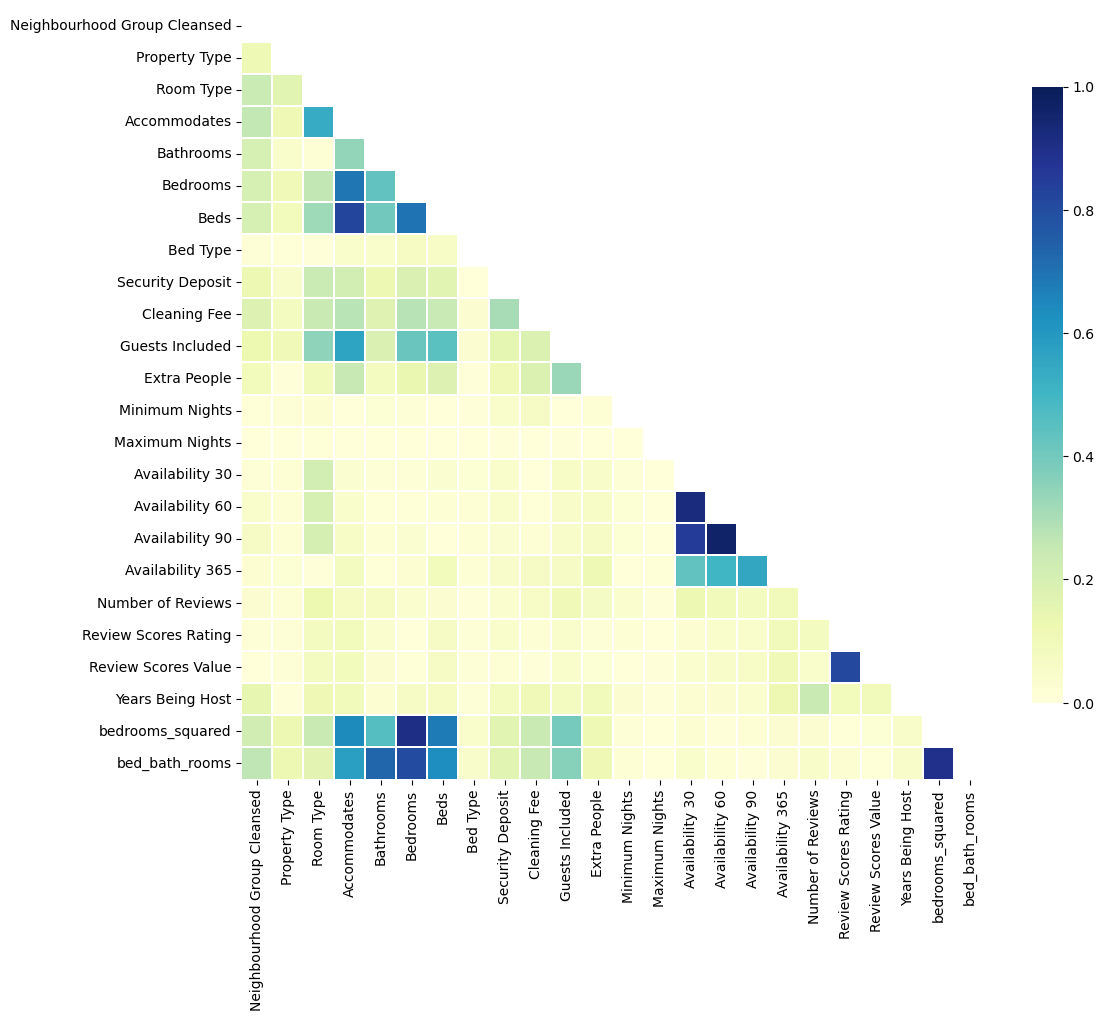

In [486]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se puede observar que hay alta correlación entre las variables Accommodates y Beds, así como entre las variables de availability y las de reviews. Se procede a eliminar la variable Accommodates, las availability, excepto Availability 365 y Reiew Scores Rating. Se decide conservar la variable de 'Review Scores Vaue'.

In [489]:
airbnb_data.drop('Accommodates', axis=1, inplace=True)
airbnb_data.drop('Beds', axis=1, inplace=True)
airbnb_data.drop('Availability 30', axis=1, inplace=True)
airbnb_data.drop('Availability 60', axis=1, inplace=True)
airbnb_data.drop('Availability 90', axis=1, inplace=True)
airbnb_data.drop('Review Scores Rating', axis=1, inplace=True)


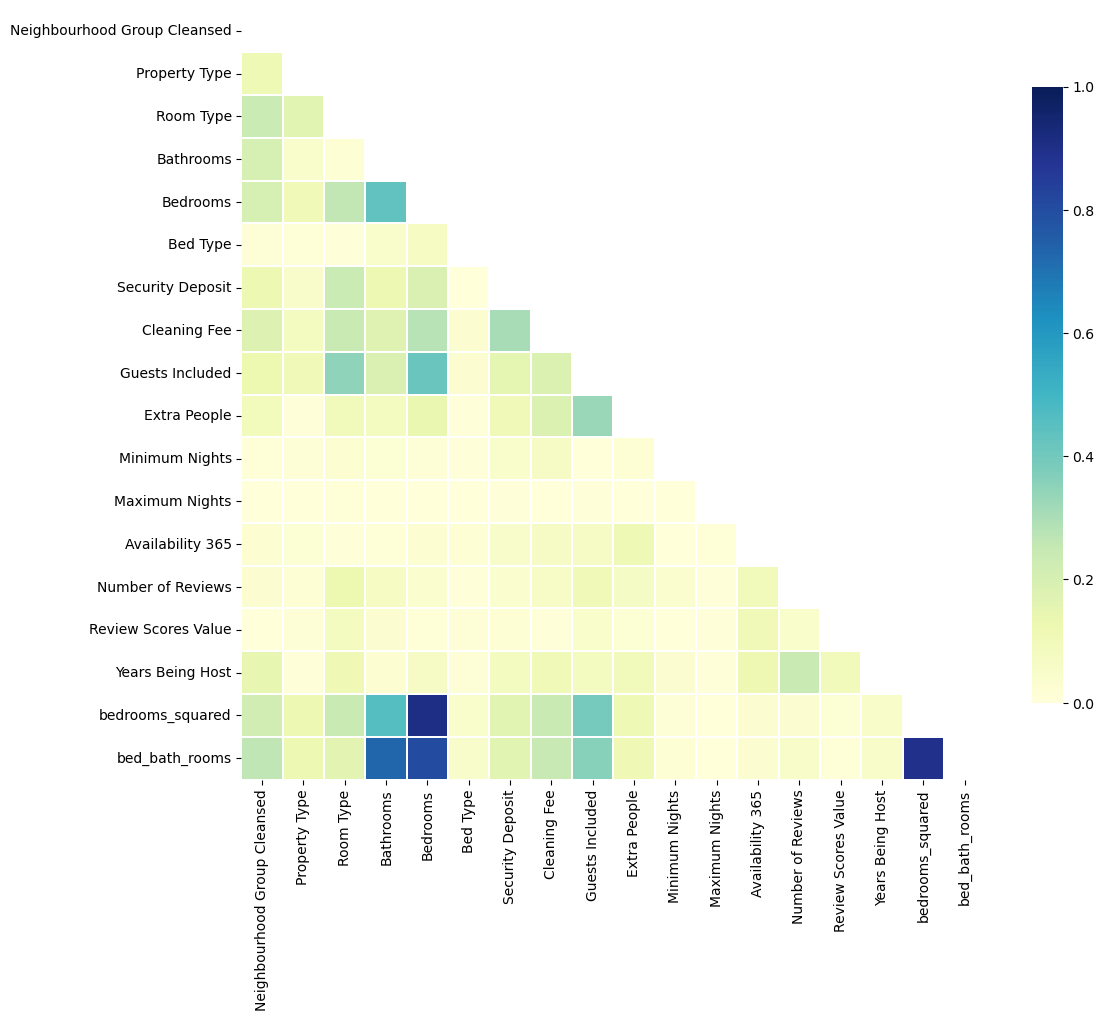

In [491]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Por último, se realiza una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

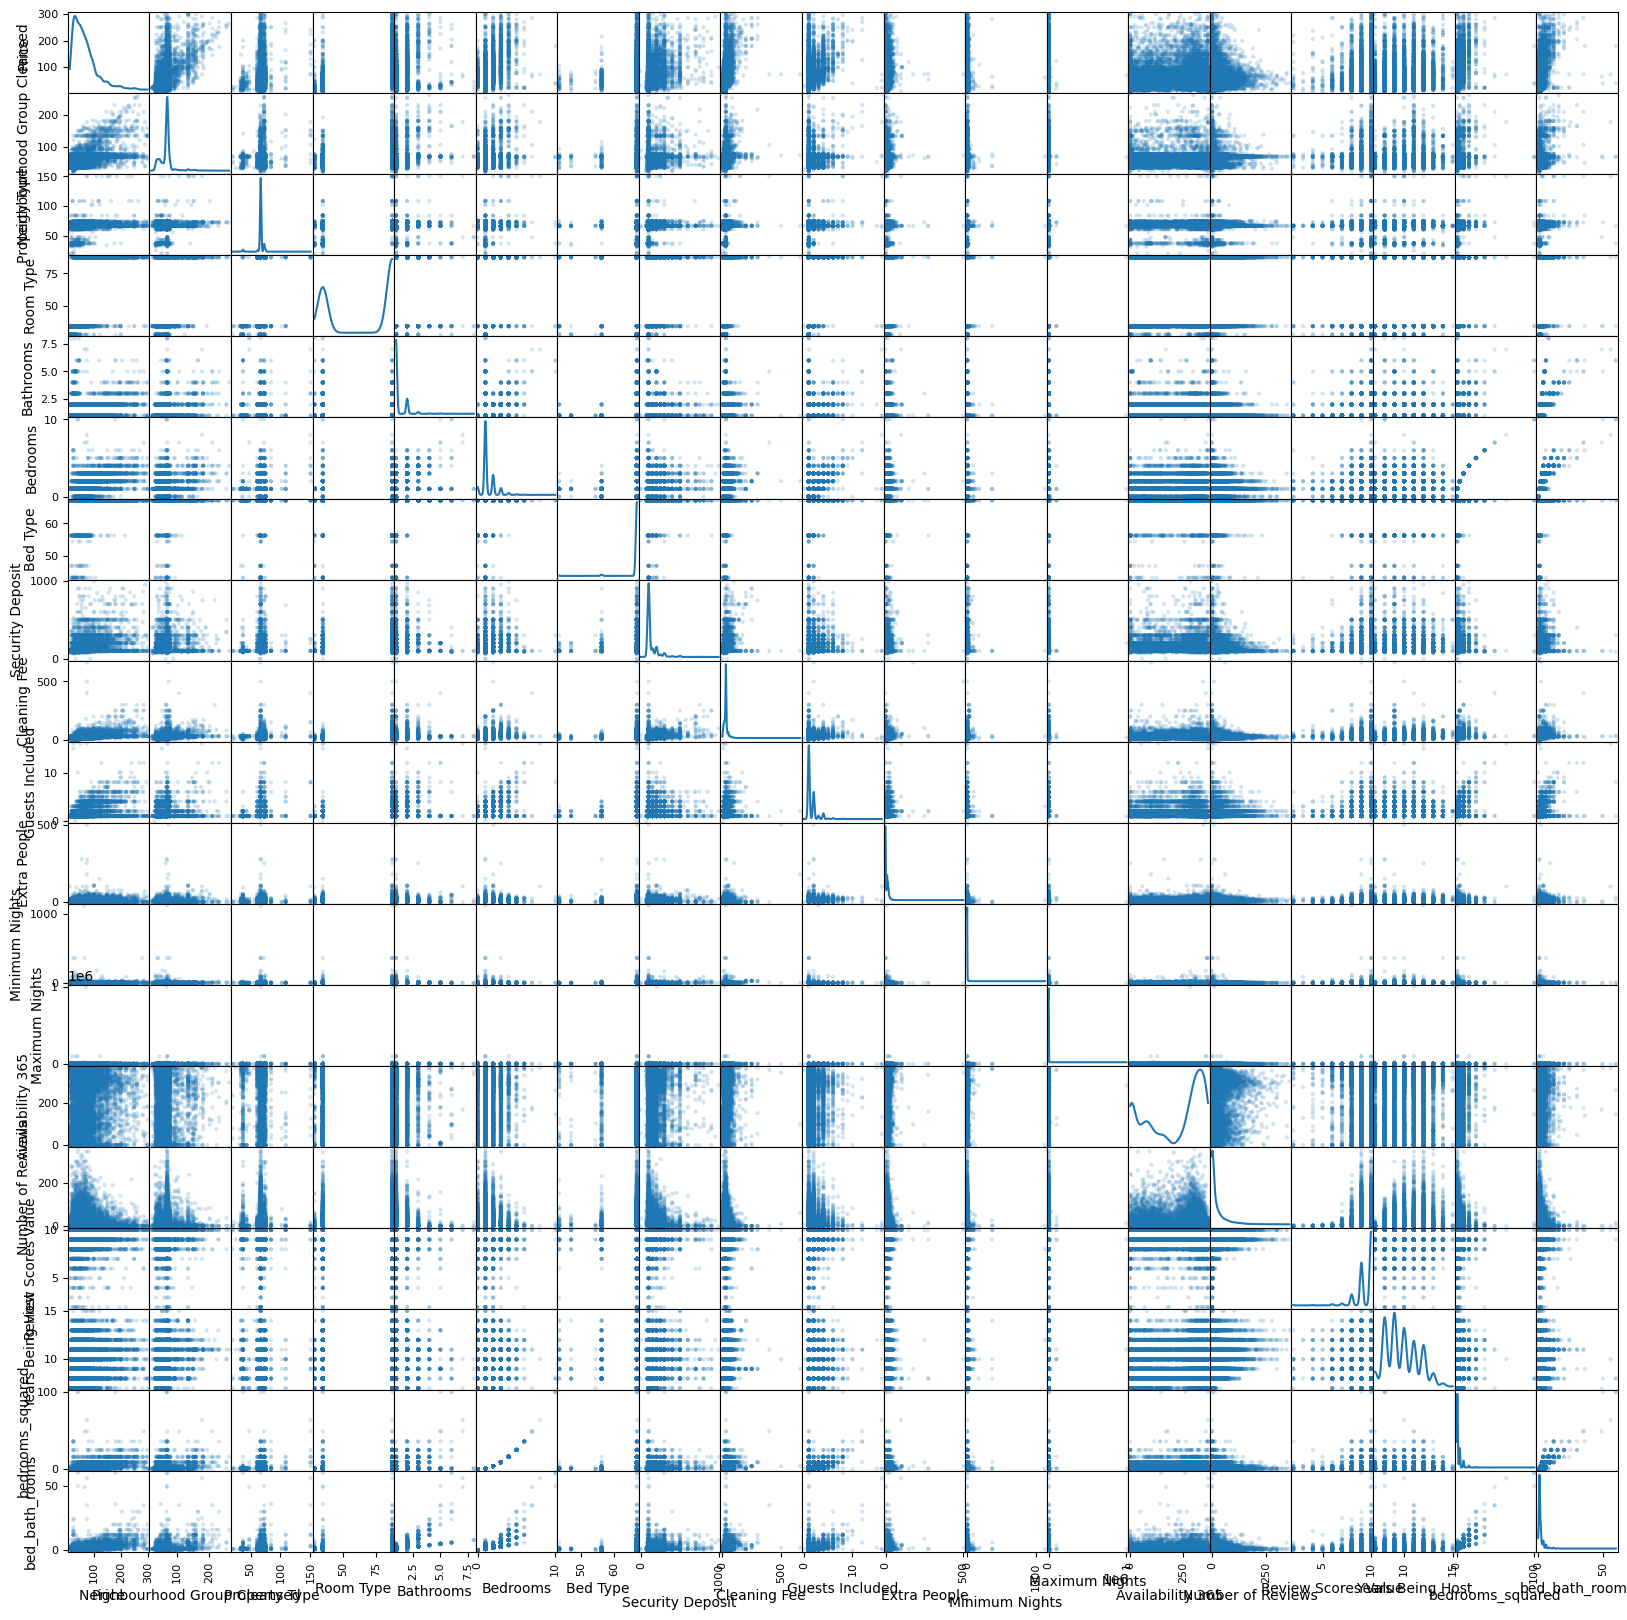

In [494]:
pd.plotting.scatter_matrix(airbnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [590]:
airbnb_data.shape

(10603, 17)

## 3. Modelado, cross-validation y estudio de resultados en train y test

Antes de modelar, se cargan los datos de test y se aplican exactamente las mismas transformaciones. Es buena práctica, combinar todo el preprocesamiento en una única celda:

In [496]:
# Carga de datos
airbnb_data = pd.read_csv('airbnb_train.csv', sep=';', decimal='.')

# Eliminación de columnas

remove_columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street', 'Zipcode', 'Market',
       'Smart Location', 'Country', 'Latitude', 'Longitude', 'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
       'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features' ]

airbnb_data.drop(remove_columns, axis=1, inplace=True)

# Imputación
#Imputación de valores de barrio
airbnb_data["Neighbourhood Group Cleansed"].fillna(airbnb_data["Neighbourhood Cleansed"], inplace=True)

#Imputación con la moda
airbnb_data['Bathrooms'].fillna(airbnb_data['Bathrooms'].mode()[0], inplace=True)
airbnb_data['Bedrooms'].fillna(airbnb_data['Bedrooms'].mode()[0], inplace=True)
airbnb_data['Beds'].fillna(airbnb_data['Beds'].mode()[0], inplace=True)

airbnb_data['Security Deposit'].fillna(airbnb_data['Security Deposit'].mode()[0], inplace=True)
airbnb_data['Cleaning Fee'].fillna(airbnb_data['Cleaning Fee'].mode()[0], inplace=True)

airbnb_data['Review Scores Rating'].fillna(airbnb_data['Review Scores Rating'].mode()[0], inplace=True)
airbnb_data['Review Scores Value'].fillna(airbnb_data['Review Scores Value'].mode()[0], inplace=True)

#Imputación con la media
airbnb_data['Price'].fillna(airbnb_data['Price'].mean(), inplace=True)

#Eliminación de las columnas de barrio que no se usarán
airbnb_data.drop('Neighbourhood', axis=1, inplace=True)
airbnb_data.drop('Neighbourhood Cleansed', axis=1, inplace=True)

#Eliminación de las columnas de localidad
airbnb_data.drop('City', axis=1, inplace=True)
airbnb_data.drop('Country Code', axis=1, inplace=True)
airbnb_data.drop('State', axis=1, inplace=True)

#Cambio de tipo de datos
airbnb_data['Bathrooms'] = airbnb_data['Bathrooms'].astype(int)
airbnb_data['Bedrooms'] = airbnb_data['Bedrooms'].astype(int)
airbnb_data['Beds'] = airbnb_data['Beds'].astype(int)

# Eliminamos outliers en bathrooms, bedrooms, price
airbnb_data = airbnb_data[airbnb_data['Bathrooms'] < 5]
airbnb_data = airbnb_data[airbnb_data['Bedrooms'] < 6]
airbnb_data = airbnb_data[airbnb_data['Price'] < 300]

#liminación de registros con valores cero
airbnb_data = airbnb_data[airbnb_data['Bathrooms'] != 0]
airbnb_data = airbnb_data[airbnb_data['Bedrooms'] != 0]
airbnb_data = airbnb_data[airbnb_data['Price'] != 0]

# Eliminación de variables redundantes
airbnb_data.drop('Accommodates', axis=1, inplace=True)
airbnb_data.drop('Beds', axis=1, inplace=True)
airbnb_data.drop('Availability 30', axis=1, inplace=True)
airbnb_data.drop('Availability 60', axis=1, inplace=True)
airbnb_data.drop('Availability 90', axis=1, inplace=True)
airbnb_data.drop('Review Scores Rating', axis=1, inplace=True)

# Generamos características
#Antigüedad del dueño en la plataforma
from datetime import datetime

airbnb_data.dropna(subset=['Host Since'], inplace=True) #se vió antes que los valores nulos corresponden al 0,02%

airbnb_data['Host Since'] = airbnb_data['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
airbnb_data['Years Being Host'] = airbnb_data['Host Since'].apply(lambda x: 2024 - x.year)

airbnb_data.drop(['Host Since'], axis=1, inplace=True)

#elevar el número de habitaciones al cuadrado
airbnb_data['bedrooms_squared'] = airbnb_data['Bedrooms'].apply(lambda x: x**2)

#relación entre dormitorios y baños
airbnb_data['bed_bath_rooms']   = airbnb_data['Bedrooms']*airbnb_data['Bathrooms']

#Encoder de variables categóricas
categorical = ['Property Type', 'Room Type', 'Bed Type', 'Neighbourhood Group Cleansed']

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = airbnb_data.groupby(c)['Price'].mean()
    airbnb_data[c] = airbnb_data[c].map(mean)    
    mean_map[c] = mean
    
# Rellenar los valores NaNs con la media de las columnas numéricas
cols = airbnb_data.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
airbnb_data = airbnb_data[cols]

airbnb_data.fillna(airbnb_data.mean(), inplace=True)

**Aplicación en test:**

In [499]:
# Carga de datos
airbnb_data_test = pd.read_csv('airbnb_test.csv', sep=';', decimal='.')

# Eliminación de columnas

remove_columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street', 'Zipcode', 'Market',
       'Smart Location', 'Country', 'Latitude', 'Longitude', 'Amenities', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
       'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features' ]

airbnb_data_test.drop(remove_columns, axis=1, inplace=True)

# Imputación
#Imputación de valores de barrio
airbnb_data_test["Neighbourhood Group Cleansed"].fillna(airbnb_data_test["Neighbourhood Cleansed"], inplace=True)

#Imputación con la moda
airbnb_data_test['Bathrooms'].fillna(airbnb_data['Bathrooms'].mode()[0], inplace=True)
airbnb_data_test['Bedrooms'].fillna(airbnb_data['Bedrooms'].mode()[0], inplace=True)
#airbnb_data_test['Beds'].fillna(airbnb_data['Beds'].mode()[0], inplace=True)

airbnb_data_test['Security Deposit'].fillna(airbnb_data['Security Deposit'].mode()[0], inplace=True)
airbnb_data_test['Cleaning Fee'].fillna(airbnb_data['Cleaning Fee'].mode()[0], inplace=True)

#airbnb_data_test['Review Scores Rating'].fillna(airbnb_data['Review Scores Rating'].mode()[0], inplace=True)
airbnb_data_test['Review Scores Value'].fillna(airbnb_data['Review Scores Value'].mode()[0], inplace=True)

#Imputación con la media
airbnb_data_test['Price'].fillna(airbnb_data['Price'].mean(), inplace=True)

#Eliminación de las columnas de barrio que no se usarán
airbnb_data_test.drop('Neighbourhood', axis=1, inplace=True)
airbnb_data_test.drop('Neighbourhood Cleansed', axis=1, inplace=True)

#Eliminación de las columnas de localidad
airbnb_data_test.drop('City', axis=1, inplace=True)
airbnb_data_test.drop('Country Code', axis=1, inplace=True)
airbnb_data_test.drop('State', axis=1, inplace=True)

#Cambio de tipo de datos
airbnb_data_test['Bathrooms'] = airbnb_data_test['Bathrooms'].astype(int)
airbnb_data_test['Bedrooms'] = airbnb_data_test['Bedrooms'].astype(int)
#airbnb_data_test['Beds'] = airbnb_data_test['Beds'].astype(int)

# Eliminamos outliers en bathrooms, bedrooms, price
airbnb_data_test = airbnb_data_test[airbnb_data_test['Bathrooms'] < 5]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Bedrooms'] < 6]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Price'] < 300]

#liminación de registros con valores cero
airbnb_data_test = airbnb_data_test[airbnb_data_test['Bathrooms'] != 0]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Bedrooms'] != 0]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Price'] != 0]

# Eliminación de variables redundantes
airbnb_data_test.drop('Accommodates', axis=1, inplace=True)
airbnb_data_test.drop('Beds', axis=1, inplace=True)
airbnb_data_test.drop('Availability 30', axis=1, inplace=True)
airbnb_data_test.drop('Availability 60', axis=1, inplace=True)
airbnb_data_test.drop('Availability 90', axis=1, inplace=True)
airbnb_data_test.drop('Review Scores Rating', axis=1, inplace=True)

# Generamos características
#Antigüedad del dueño en la plataforma
from datetime import datetime

airbnb_data_test.dropna(subset=['Host Since'], inplace=True) #se vió antes que los valores nulos corresponden al 0,02%

airbnb_data_test['Host Since'] = airbnb_data_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
airbnb_data_test['Years Being Host'] = airbnb_data_test['Host Since'].apply(lambda x: 2024 - x.year)

airbnb_data_test.drop(['Host Since'], axis=1, inplace=True)

#elevar el número de habitaciones al cuadrado
airbnb_data_test['bedrooms_squared'] = airbnb_data_test['Bedrooms'].apply(lambda x: x**2)

#relación entre dormitorios y baños
airbnb_data_test['bed_bath_rooms'] = airbnb_data_test['Bedrooms']*airbnb_data_test['Bathrooms']

#Encoder de variables categóricas
categorical = ['Property Type', 'Room Type', 'Bed Type', 'Neighbourhood Group Cleansed']

# Categorización con los datos de train
for c in categorical:
    airbnb_data_test[c] = airbnb_data_test[c].map(mean_map[c])    
    
# Rellenar los valores NaNs con la media de las columnas numéricas
cols = airbnb_data_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
airbnb_data_test = airbnb_data_test[cols]

airbnb_data_test.fillna(airbnb_data.mean(), inplace=True)

**Preparación de datos para sklearn**

In [502]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data

y_train = data_train.iloc[:,0:1].values     # nos quedamos con la 1ª columna, price
X_train = data_train.iloc[:,1:].values       # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test
y_test = data_test.iloc[:,0:1].values     # nos quedamos con la 1ª columna, price
X_test = data_test.iloc[:,1:].values      # nos quedamos con el resto

**Normalización, con los datos de train**

In [505]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [507]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10603, 18)
Datos test:  (2674, 18)


**Cross validation, búsqueda de los parámetros óptimos, visualización de performance vs complejidad**

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03162277660168379; total time=   0.0s
[CV] END ..........................alpha=0.03856620421163472; total time=   0.0s
[CV] END ..........................alpha=0.038

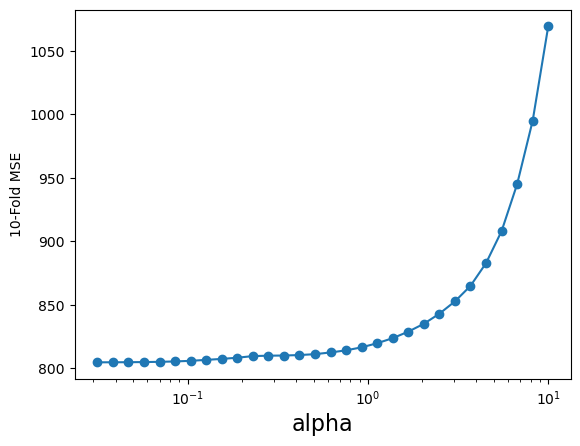

In [510]:
#Modelo Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5,1,30)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [512]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 796
MSE Modelo Lasso (test) : 809
RMSE Modelo Lasso (train): 28.2
RMSE Modelo Lasso (test) : 28.4
Neighbourhood Group Cleansed 10.679700182228494
Property Type -0.05907128958273046
Room Type 15.633989034527856
Bathrooms -2.0818860794514107
Bedrooms 12.962088955833252
Bed Type 0.41689888476079273
Security Deposit 3.439699579871879
Cleaning Fee 8.585499877890685
Guests Included 3.2682478765136445
Extra People -1.9565570299008463
Minimum Nights -0.21028310113285123
Maximum Nights -0.004438740429768392
Availability 365 1.9149168555445228
Number of Reviews -3.4056690206466538
Review Scores Value 2.2503286509189557
Years Being Host 1.4458583757794228
bedrooms_squared -11.372418852163872
bed_bath_rooms 15.960770760673775


**Conclusión**
Según el modelo Lasso, las variables con coeficientes muy cercanos a cero o negativos no contribuyen a la predicción, las cuales son:
Property Type, Bathrooms, Bed Type, Extra People, Minimum Nights, Maximum Nights, Number of Reviews, bedrooms_squared

**MODELO RANDOM FOREST**

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END .....................................

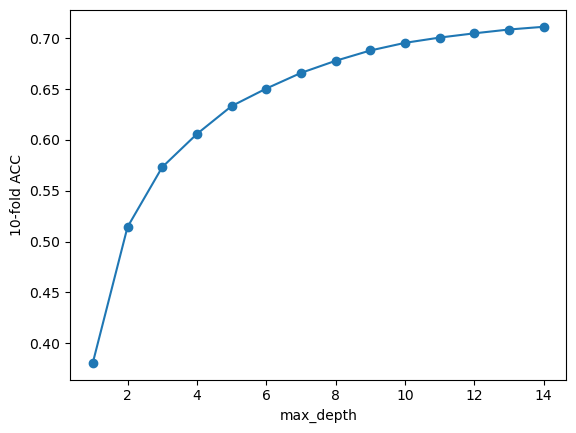

In [514]:
#MODELO RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

rf = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=2) 
rf.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(rf.best_score_))
print("best parameters: {}".format(rf.best_params_))

scores = np.array(rf.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [515]:
print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))

Train:  0.8729086039968239
Test:  0.7128581701372643


In [516]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)
print('R^2 en datos de test: ' + str(round(rf_testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error,3)))

R^2 en datos de test: 0.713
Mediana del error en datos de test: 10.925
Media del error en datos de test: 16.743


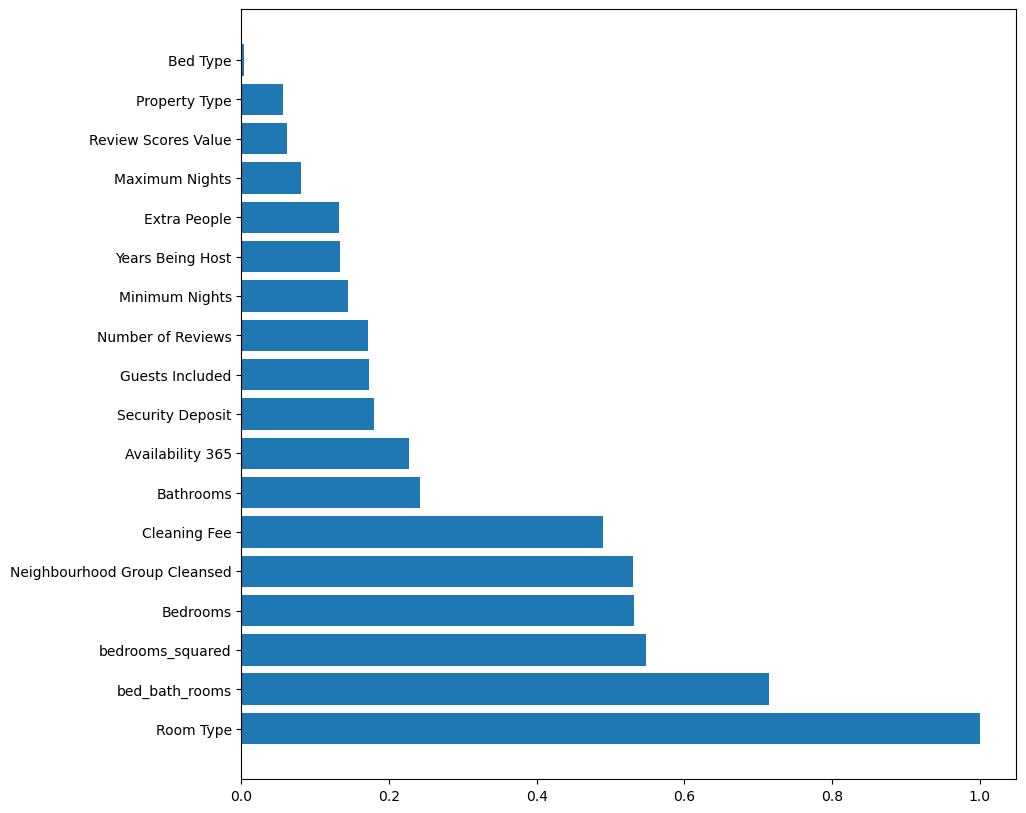

In [517]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

**Conclusión:** Según el modelo Random Forest, las variables que menos contribuyen a la predicción son: Bed Type, Property Type, Review Scores Value, Maximum Nights.  Este resultado es similar a lo obtenido en el modelo Lasso.

Además se observa que el modelo en Train tiene una precisión del 87,29% mientras que en Test la precisión es del 71,28%, lo cual indica que el modelo está sobreajustado.

Por lo tanto se procede a eliminar unas variables menos representativas y correr nuevamente el modelo.


In [524]:
#Eliminar variables menos representativas
remove_cols_no_imp = ['Bed Type', 'Property Type']

airbnb_data.drop(remove_cols_no_imp, axis=1, inplace=True)
airbnb_data_test.drop(remove_cols_no_imp, axis=1, inplace=True)

In [526]:
#Preparación para Sklearn Segunda Corrida
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data
y_train = data_train.iloc[:,0:1].values     # nos quedamos con la 1ª columna, price
X_train = data_train.iloc[:,1:].values       # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test
y_test = data_test.iloc[:,0:1].values     # nos quedamos con la 1ª columna, price
X_test = data_test.iloc[:,1:].values      # nos quedamos con el resto

**MODELO RANDOM FOREST - SEGUNDA CORRIDA**

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END .....................................

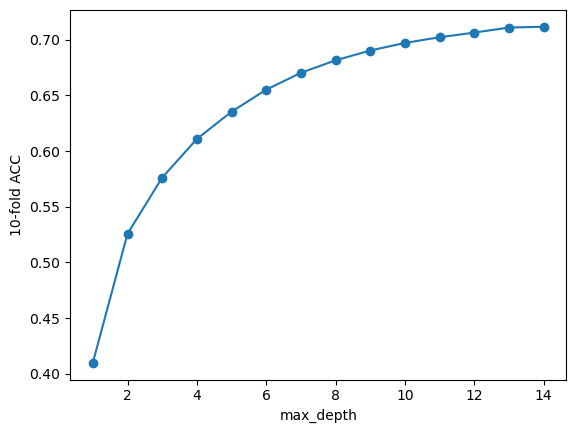

In [568]:
#RANDOM FOREST SEGUNDA CORRIDA
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

rf1 = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=2) 
rf1.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(rf.best_score_))
print("best parameters: {}".format(rf.best_params_))

scores = np.array(rf1.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()


In [570]:
#Resultados Random Forest Segunda Corrida, maxDepth = 14
print("Train: ",rf1.score(X_train,y_train))
print("Test: ",rf1.score(X_test,y_test))

Train:  0.8768599912527488
Test:  0.7127029955745054


In [566]:
#Resultados Random Forest Segunda Corrida, maxDepth = 12
print("Train: ",rf1.score(X_train,y_train))
print("Test: ",rf1.score(X_test,y_test))

Train:  0.8377095279040897
Test:  0.7035523259076198


In [562]:
#Resultados Random Forest Segunda Corrida, maxDepth = 13
print("Train: ",rf1.score(X_train,y_train))
print("Test: ",rf1.score(X_test,y_test))

Train:  0.8581742938304006
Test:  0.7075959278671287


**Conclusión:** Como se observa, no se consigue mejora de los resultados del modelo en Train y Test con la eliminación de variables que parecen poco representativas. Se probó con maxDepth = 12 y maxDepth = 13, con lo cual se reduce el sobreajuste, pero no mejora el resultado en Test. 

Se necesita volver a la fase de análisis y revisar la fase de preparación de los datos, quizás se cometió algún error o se eliminaron variables que pudieran aportar a la predicción.

**SEGUNDO MODELO - GRADIENT BOOSTING**

In [530]:
#SEGUNDO MODELO GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.4s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.5s
[CV] END ...............learning_rate=0.1, n_esti

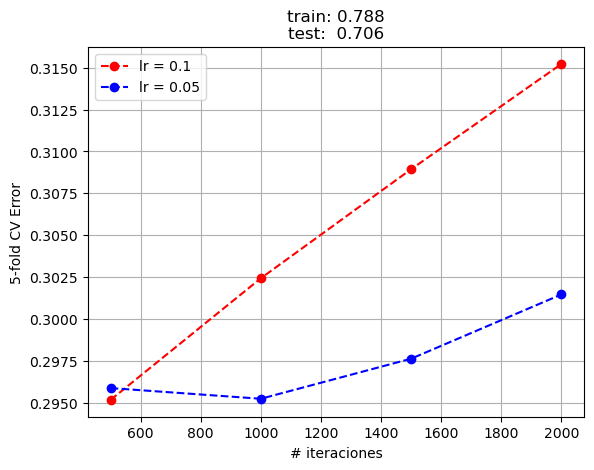

In [531]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [532]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.7877608003952571
Test:  0.705936916781208


**Conclusión** Con este modelo, los resultados en Test, son similares al modelo Random Forest.  Esto confirma que es necesario volver a la fase de análisis.

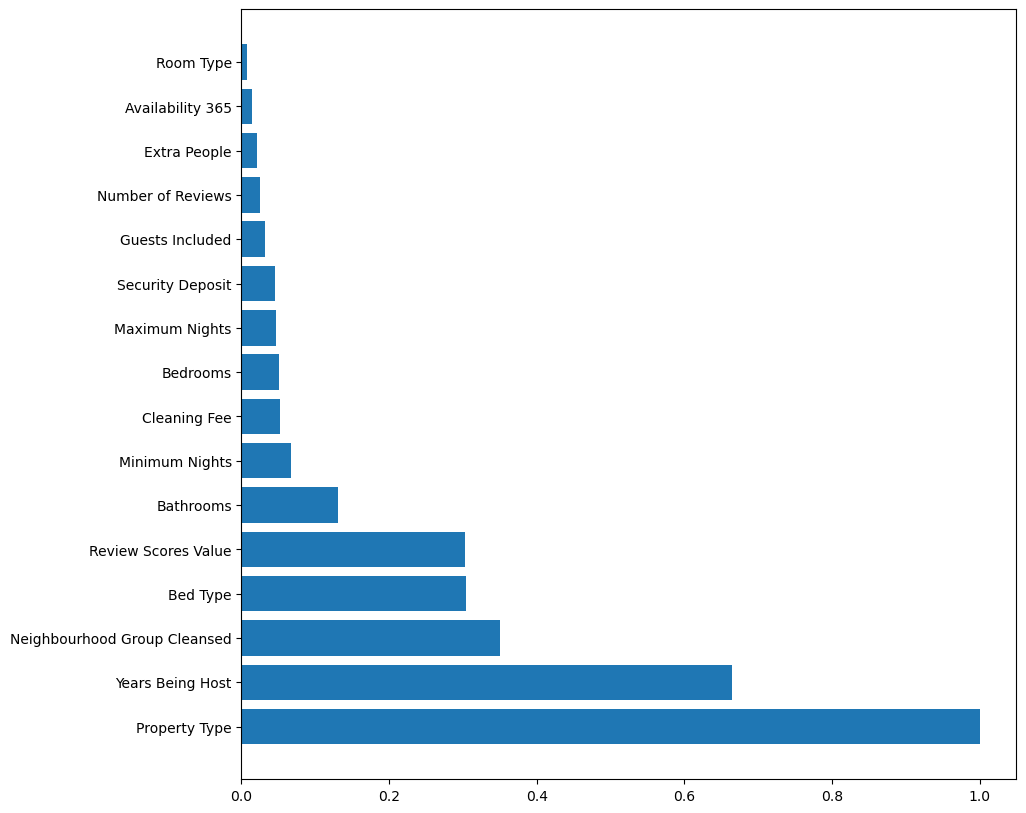

In [533]:
#Importancia de las variables
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

**TERCER MODELO - LGBM**

In [535]:
### LightGBM
from lightgbm import LGBMRegressor

bt = LGBMRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500, force_row_wise='true')
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 10603, number of used features: 16
[LightGBM] [Info] Start training from score 67.221593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

**Conclusión:** Con este modelo no se consiguen resultados aceptables, se lo descarta.

**CONCLUSIÓN FINAL:** Se realizó un análisis exhaustivo de las variables del dataset, con lo cual se redujo de 89 variables a 17 variables.  A través del modelamiento se identificó que un par de variables parecen no ser representativas.  En la evaluación de los modelos, se probaron 3 modelos. Los mejores resultados se obtuvieron con Random Forest.  Estos resultados fueron un tanto aceptables en Test (70%). Pese a las pruebas realizadas no se consiguieron mejoras, lo cual indica que es neceario revisar la fase de análisis a fin de contar con los datos que permitan mejorar la predicción.